# Module Seven Discussion: Random Forest

This notebook will take you step-by-step through the calculations required for your Module Seven discussion post. It is very important to run through the steps in order. Some steps depend on the outputs of earlier steps. Once you have completed the steps in this notebook, be sure to answer the questions in the discussion for this module.

## Step 1: Loading the Data Set
You are a scientist working for NASA and you have access to a set of historical data that can be used in analyzing the diameter of asteroids and sorting them into small or large categories. This data set also has other variables that are important in estimating the size of an asteroid. You will use this data set to create models and predict the size and diameter of asteroids.

This block of R code will load the **asteroid.csv** data set. Here are the variables that will be retained.

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> size </div> | <div style="text-align: left"> Size of the asteroid (LARGE or SMALL) </div> |
| <div style="text-align: left"> diameter </div> | <div style="text-align: left"> Diameter of the asteroid </div> |
| <div style="text-align: left"> eccentricity </div> | <div style="text-align: left"> Measure of orbit deviation around another object relative to a perfect circle </div> |
| <div style="text-align: left"> inclination </div> | <div style="text-align: left"> Inclination with respect to x-y ecliptic plane </div> |
| <div style="text-align: left"> orb_period </div> | <div style="text-align: left"> Time it takes to complete one orbit around the Sun </div> |
| <div style="text-align: left"> albedo </div> | <div style="text-align: left"> Measure of reflectivity or brightness </div> |
| <div style="text-align: left"> rot_per </div> | <div style="text-align: left"> Time it takes to rotate once </div> |

Reference:
Basu, V. (2019). Open asteroid dataset. [Data file and codebook]. Retrieved from https://www.kaggle.com/basu369victor/prediction-of-asteroid-diameter

Click the code section below and hit the **Run** button above.

In [1]:
asteroid <- read.csv(file='asteroid.csv', header=TRUE, sep=",")
#vars <- c('sm_axis', 'eccentricity', 'inclination', 'longitude', 'arg_perihelion', 'dist_perihelion', 'dist_aphelion', 'orb_period', 'data_arc', 'albedo', 'rot_per', 'moid', 'size','diameter')
vars <- c('size','diameter','eccentricity', 'inclination', 'orb_period', 'albedo', 'rot_per')

asteroid <- asteroid[vars]

print("head")
head(asteroid, 6)

[1] "head"


size,diameter,eccentricity,inclination,orb_period,albedo,rot_per
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SMALL,34.274,0.08799001,3.192670,4.868277,0.2590,8.659
SMALL,62.218,0.18058295,15.808863,4.517439,0.0570,10.460
SMALL,64.849,0.14118079,12.120872,4.842587,0.1690,5.744
SMALL,38.490,0.03637043,5.176071,3.838281,0.1700,22.346
SMALL,61.390,0.13229807,2.422958,4.358269,0.1770,9.012
LARGE,83.420,0.17332212,23.262422,4.576697,0.3052,35.864


## Step 2: Splitting Data into Training and Testing Sets
In this step, you will split the data set into training and testing sets. The training set will be used to train the random forest model and the testing set will be used to test the utility of the model. The training and testing set split will be 80% and 20% respectively. 
<br><br>

<font color='red'>**Do not change the seed value!**</font>


Click the block of code below and hit the **Run** button above.  

In [2]:
set.seed(915839)

# Partition the data set into training and testing data
samp.size = floor(0.80*nrow(asteroid))

# Training set
print("Number of rows for the training set")
train_ind = sample(seq_len(nrow(asteroid)), size = samp.size)
train.data = asteroid[train_ind,]
nrow(train.data)

# Testing set 
print("Number of rows for the testing set")
test.data = asteroid[-train_ind,]
nrow(test.data)

[1] "Number of rows for the training set"


[1] 366

[1] "Number of rows for the testing set"


[1] 92

## Step 3: Random Forest Classification Model (Using Two Trees)
This step will create the random forest classification model using only two trees for training. The model will predict the size of an asteroid using eccentricity, orbital period, and rotation period. The confusion matrix will then be printed for the training and testing set. 
<br><br>

<font color='red'>**Do not change the seed value!**</font>


Click the block of code below and hit the **Run** button above.  

In [3]:
set.seed(915839)
library(randomForest)
model_rf1 <- randomForest(size ~ eccentricity+orb_period+rot_per, data=train.data, ntree = 2)

# Confusion matrix
print("======================================================================================================================")
print('Confusion Matrix: TRAINING set based on random forest model built using 2 trees')
train.data.predict <- predict(model_rf1, train.data, type = "class")

# Construct the confusion matrix
conf.matrix <- table(train.data$size, train.data.predict)[,c('LARGE','SMALL')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

# Print a nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)


print("======================================================================================================================")
print('Confusion Matrix: TESTING set based on random forest model built using 2 trees')
test.data.predict <- predict(model_rf1, test.data, type = "class")

# Construct the confusion matrix
conf.matrix <- table(test.data$size, test.data.predict)[,c('LARGE','SMALL')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

# Print a nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


[1] "======================================================================================================================"
[1] "Confusion Matrix: TRAINING set based on random forest model built using 2 trees"


,Prediction: LARGE,Prediction: SMALL
Actual: LARGE,164,16
Actual: SMALL,43,143


[1] "======================================================================================================================"
[1] "Confusion Matrix: TESTING set based on random forest model built using 2 trees"


,Prediction: LARGE,Prediction: SMALL
Actual: LARGE,36,15
Actual: SMALL,19,22


## Step 4: Random Forest Classification Model (Using Five Trees)
This step will create the same random forest classification model from the previous step but will use five decision trees. Notice the slight improvement in true positive and true negative counts.  
<br><br>

<font color='red'>**Do not change the seed value!**</font>

Click the code section below and hit the **Run** button above.

In [4]:
set.seed(915839)
library(randomForest)
model_rf2 <- randomForest(size ~ eccentricity+orb_period+rot_per, data=train.data, ntree = 5)

# Confusion matrix
print("======================================================================================================================")
print('Confusion Matrix: TRAINING set based on random forest model built using 5 trees')
train.data.predict <- predict(model_rf2, train.data, type = "class")

# Construct the confusion matrix
conf.matrix <- table(train.data$size, train.data.predict)[,c('LARGE','SMALL')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

# Print nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)


print("======================================================================================================================")
print('Confusion Matrix: TESTING set based on random forest model built using 5 trees')
test.data.predict <- predict(model_rf2, test.data, type = "class")

# Construct the confusion matrix
conf.matrix <- table(test.data$size, test.data.predict)[,c('LARGE','SMALL')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

# Print nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)


[1] "======================================================================================================================"
[1] "Confusion Matrix: TRAINING set based on random forest model built using 5 trees"


,Prediction: LARGE,Prediction: SMALL
Actual: LARGE,174,6
Actual: SMALL,21,165


[1] "======================================================================================================================"
[1] "Confusion Matrix: TESTING set based on random forest model built using 5 trees"


,Prediction: LARGE,Prediction: SMALL
Actual: LARGE,35,16
Actual: SMALL,14,27


## Step 5: Graphing the Training and Testing Error Against the Number of Trees 
In this step, you will create a graph of classification errors for the training and testing sets using random forest classification models with increasing numbers of trees. The idea here is to find the optimal number of trees that minimizes the training classification error. The optimal number of trees will then be used to train the model.
<br><br>

<font color='red'>**Do not change the seed value!**</font>


Click the code section below and hit the **Run** button above.

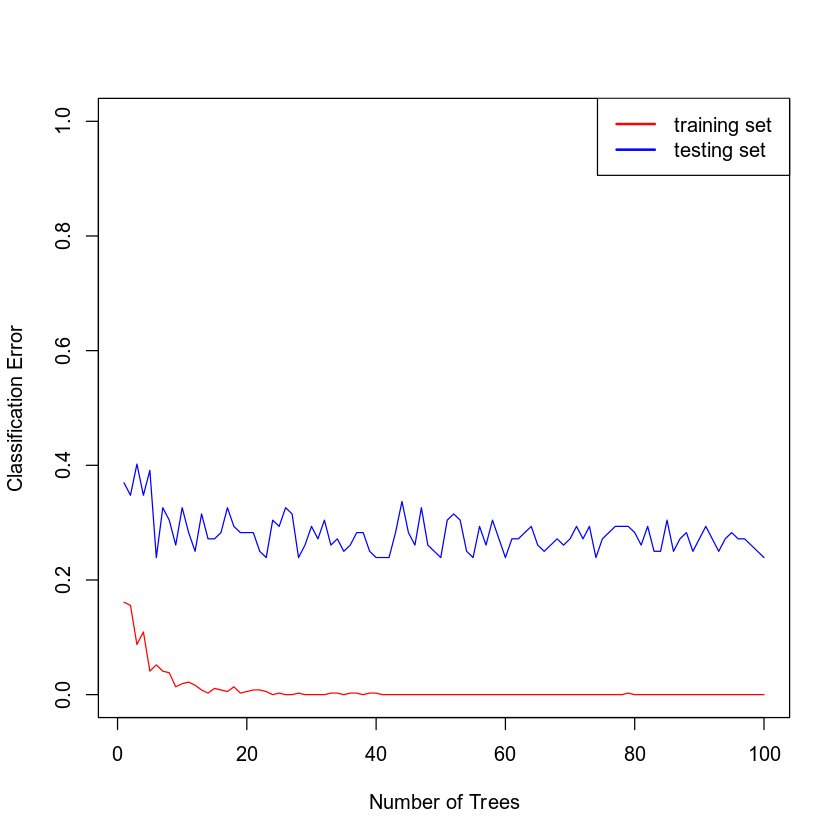

In [5]:
set.seed(915839)
library(randomForest)

# checking
#=====================================================================
train = c()
test = c()
trees = c()

for(i in seq(from=1, to=100, by=1)) {
    #print(i)
    
    trees <- c(trees, i)
    
    model_rf3 <- randomForest(size ~ eccentricity+orb_period+rot_per, data=train.data, ntree = i)
    
    train.data.predict <- predict(model_rf3, train.data, type = "class")
    conf.matrix1 <- table(train.data$size, train.data.predict)
    train_error = 1-(sum(diag(conf.matrix1)))/sum(conf.matrix1)
    train <- c(train, train_error)
    
    test.data.predict <- predict(model_rf3, test.data, type = "class")
    conf.matrix2 <- table(test.data$size, test.data.predict)
    test_error = 1-(sum(diag(conf.matrix2)))/sum(conf.matrix2)
    test <- c(test, test_error)
}
 
#matplot (trees, cbind (train, test), ylim=c(0,0.5) , type = c("l", "l"), lwd=2, col=c("red","blue"), ylab="Error", xlab="number of trees")
#legend('topright',legend = c('training set','testing set'), col = c("red","blue"), lwd = 2 )

plot(trees, train,type = "l",ylim=c(0,1.0),col = "red", xlab = "Number of Trees", ylab = "Classification Error")
lines(test, type = "l", col = "blue")
legend('topright',legend = c('training set','testing set'), col = c("red","blue"), lwd = 2 )

### Optimal Number of Trees
From the output, the classification error curve flattens at approximately 20 trees. Beyond this, the error is roughly the same even if the number of trees increases. Therefore, 20 trees are optimal for this data set. 

## Step 6: Random Forest Classification Model (Using 20 Trees)
This step will create the same random forest classification model from step 4, but will now use the optimal number
of trees found in the previous step (20). 
<br><br>

<font color='red'>**Do not change the seed value!**</font>

Click the code section below and hit the **Run** button above.

In [6]:
set.seed(915839)
library(randomForest)
model_rf4 <- randomForest(size ~ eccentricity+orb_period+rot_per, data=train.data, ntree = 20)

# Confusion matrix
print("======================================================================================================================")
print('Confusion Matrix: TRAINING set based on random forest model built using 20 trees')
train.data.predict <- predict(model_rf4, train.data, type = "class")

# Construct the confusion matrix
conf.matrix <- table(train.data$size, train.data.predict)[,c('LARGE','SMALL')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

# Print nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)


print("======================================================================================================================")
print('Confusion Matrix: TESTING set based on random forest model built using 20 trees')
test.data.predict <- predict(model_rf4, test.data, type = "class")

# Construct the confusion matrix
conf.matrix <- table(test.data$size, test.data.predict)[,c('LARGE','SMALL')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

# Print nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)


[1] "======================================================================================================================"
[1] "Confusion Matrix: TRAINING set based on random forest model built using 20 trees"


,Prediction: LARGE,Prediction: SMALL
Actual: LARGE,179,1
Actual: SMALL,1,185


[1] "======================================================================================================================"
[1] "Confusion Matrix: TESTING set based on random forest model built using 20 trees"


,Prediction: LARGE,Prediction: SMALL
Actual: LARGE,37,14
Actual: SMALL,13,28


## Step 7: Predictions on the Testing Set
This step will use the model trained with the optimal number of trees to predict the sizes of asteroids in the testing set. 

Click the code section below and hit the **Run** button above.

In [7]:
predicted_size <- predict(model_rf4, test.data, type = "class")
predicted_size_df <- data.frame(predicted_size)
data <- cbind('actual size'=test.data$size, 'predicted size'=predicted_size_df)
print(data)

    actual size predicted_size
1         SMALL          SMALL
4         SMALL          SMALL
15        SMALL          SMALL
24        LARGE          SMALL
29        LARGE          LARGE
35        SMALL          SMALL
36        SMALL          LARGE
38        LARGE          LARGE
41        LARGE          LARGE
45        LARGE          LARGE
48        SMALL          SMALL
56        LARGE          LARGE
60        LARGE          LARGE
61        LARGE          SMALL
69        LARGE          LARGE
71        LARGE          LARGE
74        SMALL          SMALL
75        LARGE          LARGE
81        LARGE          LARGE
90        LARGE          LARGE
96        LARGE          SMALL
100       SMALL          LARGE
106       SMALL          SMALL
107       SMALL          SMALL
108       LARGE          SMALL
115       LARGE          LARGE
126       LARGE          LARGE
129       LARGE          SMALL
131       LARGE          LARGE
141       SMALL          SMALL
160       SMALL          SMALL
177     

## Step 8: Random Forest Regression Model (Using Two Trees)
This step will create a random forest regression model using only two trees for training. The model will predict the diameter of an asteroid using eccentricity, inclination, rotation period, orbital period, and albedo. The root mean squared error (RMSE) will be printed to test the utility of the model. 
<br><br>

<font color='red'>**Do not change the seed value!**</font>


Click the block of code below and hit the **Run** button above.  

In [8]:
set.seed(915839)
library(randomForest)
model_rf5 <- randomForest(diameter ~ eccentricity+inclination+rot_per+orb_period+albedo, data=train.data, ntree = 2)


# Root mean squared error
RMSE = function(pred, obs) {
    return(sqrt( sum( (pred - obs)^2 )/length(pred) ) )
}

print("======================================================================================================================")
print('Root Mean Squared Error: TRAINING set based on random forest regression model built using 2 trees')
pred <- predict(model_rf5, newdata=train.data, type='response')
RMSE(pred, train.data$diameter)


print("======================================================================================================================")
print('Root Mean Squared Error: TESTING set based on random forest regression model built using 2 trees')
pred <- predict(model_rf5, newdata=test.data, type='response')
RMSE(pred, test.data$diameter)

[1] "======================================================================================================================"
[1] "Root Mean Squared Error: TRAINING set based on random forest regression model built using 2 trees"


[1] 34.11905

[1] "======================================================================================================================"
[1] "Root Mean Squared Error: TESTING set based on random forest regression model built using 2 trees"


[1] 121.3429

## Step 9: Random Forest Regression Model (Using Five Trees)
This step will create the same random forest regression model from the previous step but will use five decision trees. Notice the slight improvement in RMSE.   
<br><br>

<font color='red'>**Do not change the seed value!**</font>

Click the code section below and hit the **Run** button above.

In [9]:
set.seed(915839)
library(randomForest)
model_rf6 <- randomForest(diameter ~ eccentricity+inclination+rot_per+orb_period+albedo, data=train.data, ntree = 5)


# Root mean squared error
RMSE = function(pred, obs) {
    return(sqrt( sum( (pred - obs)^2 )/length(pred) ) )
}

print("======================================================================================================================")
print('Root Mean Squared Error: TRAINING set based on random forest model built using 5 trees')
pred <- predict(model_rf6, newdata=train.data, type='response')
RMSE(pred, train.data$diameter)


print("======================================================================================================================")
print('Root Mean Squared Error: TESTING set based on random forest model built using 5 trees')
pred <- predict(model_rf6, newdata=test.data, type='response')
RMSE(pred, test.data$diameter)

[1] "======================================================================================================================"
[1] "Root Mean Squared Error: TRAINING set based on random forest model built using 5 trees"


[1] 29.79149

[1] "======================================================================================================================"
[1] "Root Mean Squared Error: TESTING set based on random forest model built using 5 trees"


[1] 116.8642

## Step 10: Graphing the Training and Testing Root Mean Squared Error against the Number of Trees 
In this step, you will create a graph of root mean squared errors for the training and testing sets using random forest regression models with increasing numbers of trees. This step will help you identify the optimal number of trees that minimizes the root mean squared error. The optimal number of trees will then be used to train the model.
<br><br>

<font color='red'>**Do not change the seed value!**</font>

Click the code section below and hit the **Run** button above.

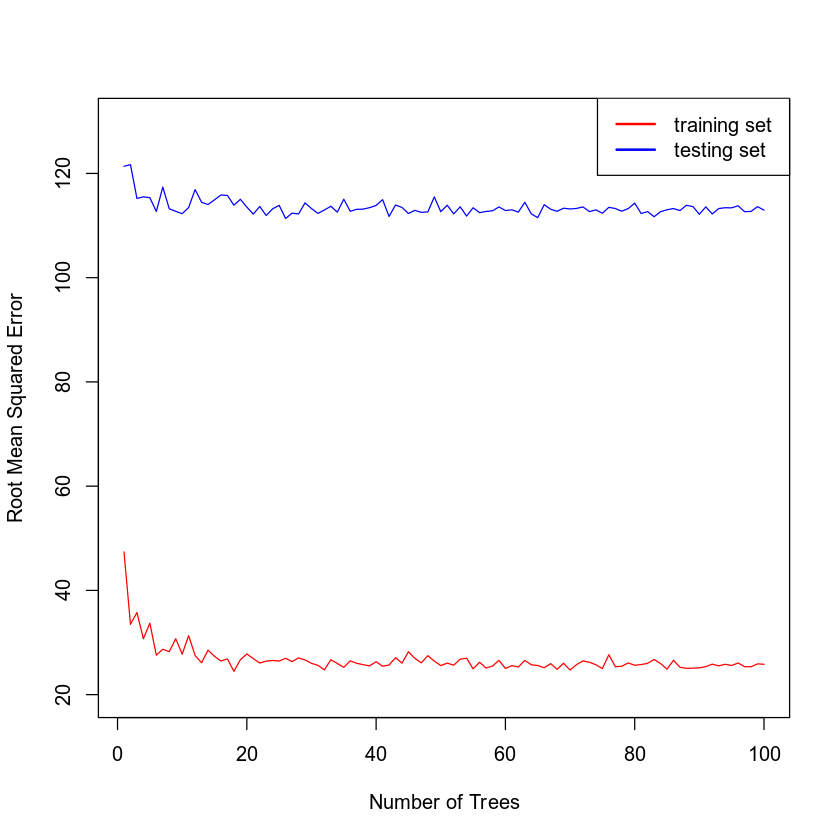

In [10]:
set.seed(915839)
library(randomForest)

# Root mean squared error
RMSE = function(pred, obs) {
    return(sqrt( sum( (pred - obs)^2 )/length(pred) ) )
}


# checking
#=====================================================================
train = c()
test = c()
trees = c()

for(i in seq(from=1, to=100, by=1)) {
    trees <- c(trees, i)
    model_rf7 <- randomForest(diameter ~ eccentricity+inclination+rot_per+orb_period+albedo, data=train.data, ntree = i)
    
    pred <- predict(model_rf7, newdata=train.data, type='response')
    rmse_train <-  RMSE(pred, train.data$diameter)
    train <- c(train, rmse_train)
    
    pred <- predict(model_rf7, newdata=test.data, type='response')
     rmse_test <-  RMSE(pred, test.data$diameter)
    test <- c(test, rmse_test)
}
 
plot(trees, train,type = "l",ylim=c(20,130),col = "red", xlab = "Number of Trees", ylab = "Root Mean Squared Error")
lines(test, type = "l", col = "blue")
legend('topright',legend = c('training set','testing set'), col = c("red","blue"), lwd = 2 )

### Optimal Number of Trees
From the output, the root mean squared error curve flattens at approximately 16-20 trees. Beyond this, the error is roughly the same even if the number of trees increases.  


## Step 11: Random Forest Regression Model (Using 20 Trees)
This step will create the same random forest regression model from step 9 but will now use the optimal number
of trees found in the previous step. The model below uses 20 trees. 

In [11]:
set.seed(915839)
library(randomForest)
model_rf8 <- randomForest(diameter ~ eccentricity+inclination+rot_per+orb_period+albedo, data=train.data, ntree = 20)


# Root mean squared error
RMSE = function(pred, obs) {
    return(sqrt( sum( (pred - obs)^2 )/length(pred) ) )
}

print("======================================================================================================================")
print('Root Mean Squared Error: TRAINING set based on random forest model built using 20 trees')
pred <- predict(model_rf8, newdata=train.data, type='response')
RMSE(pred, train.data$diameter)


print("======================================================================================================================")
print('Root Mean Squared Error: TESTING set based on random forest model built using 20 trees')
pred <- predict(model_rf8, newdata=test.data, type='response')
RMSE(pred, test.data$diameter)

[1] "======================================================================================================================"
[1] "Root Mean Squared Error: TRAINING set based on random forest model built using 20 trees"


[1] 26.31044

[1] "======================================================================================================================"
[1] "Root Mean Squared Error: TESTING set based on random forest model built using 20 trees"


[1] 112.8721

## Step 12: Predictions on the Testing Set
This step will use the model trained with the optimal number of trees to predict the diameters of asteroids in the testing set. 

Click the code section below and hit the **Run** button above.

In [12]:
predicted_diameter <- predict(model_rf8, newdata=test.data, type='response')
predicted_diameter_df <- data.frame(predicted_diameter)
data <- cbind('actual diameter'=test.data$diameter, 'predicted diameter'=predicted_diameter_df)
print(data)

    actual diameter predicted_diameter
1            34.274           40.45395
4            38.490           81.08338
15           16.840           58.76384
24          151.711          116.84189
29          118.803          117.48260
35           49.460           80.84582
36           48.424          167.79934
38           84.787          124.88963
41          142.380           73.07041
45           86.090           69.43644
48           54.874          148.30059
56           85.937           79.20140
60          129.125          143.85302
61          160.736           85.26585
69          120.600           93.57226
71          127.639          127.47234
74           19.768           63.81065
75          103.000          105.16366
81          143.346           78.36461
90          180.652          139.69143
96          222.792          109.80333
100          52.393          119.56840
106          32.894           53.78527
107          11.696           47.97694
108         122.000      

## End of Module Seven Jupyter Notebook
The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all of the questions in the Module Seven Discussion. 